<a href="https://colab.research.google.com/github/Derrick-Majani/Star_Hotels/blob/main/StarHotels_INNHotels_CART.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [318]:
# Apart from usual libraries we require 3 more
import io
import os
import sys
from sklearn import preprocessing

#warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

#warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import seaborn as sns
import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

import warnings
sns.set(color_codes=True)


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

In [319]:
# Use Local drives to upload the csv on google colab
from google.colab import files
uploaded = files.upload()

Saving INNHotelsGroup.csv to INNHotelsGroup (2).csv


In [321]:
# Read data uploaded on root / local directory on cloud using I/O library
df = pd.read_csv(io.BytesIO(uploaded['INNHotelsGroup.csv']))
df.sample(n=5)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
21475,INN21476,2,0,0,1,Meal Plan 1,0,Room_Type 4,31,2018,6,16,Online,0,0,0,132.60000,0,Canceled
12784,INN12785,2,0,0,1,Meal Plan 2,0,Room_Type 1,184,2018,8,17,Online,0,0,0,139.50000,1,Canceled
33659,INN33660,2,0,1,0,Meal Plan 1,0,Room_Type 1,78,2018,8,7,Online,0,0,0,117.90000,0,Canceled
29358,INN29359,2,0,0,1,Not Selected,0,Room_Type 1,31,2018,3,17,Online,0,0,0,71.10000,1,Not_Canceled
6223,INN06224,2,1,0,3,Meal Plan 1,0,Room_Type 1,120,2018,7,13,Online,0,0,0,121.50000,1,Not_Canceled


In [322]:
# copying data to another variable to avoid any changes to original data
hotel = df.copy()

In [323]:
# copying data to another variable to avoid any changes to original data
hotel1 = df.copy()

## Data Overview

- Observations
- Sanity checks

In [324]:
hotel.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


In [325]:
hotel.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80000,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95000,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39000,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50000,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67000,0,Not_Canceled


In [326]:
hotel.shape

(36275, 19)

- The dataset has 36275 rows and 19 columns

In [327]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

- type_of_meal_plan, room_type_reserved, market_segment_type, and booking_status are of object type while rest columns are numeric in nature.

In [328]:
def missing_check(hotel):
    total = hotel.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (hotel.isnull().sum()/hotel.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(hotel)

,Total,Percent
Booking_ID,0,0.00000
arrival_month,0,0.00000
no_of_special_requests,0,0.00000
avg_price_per_room,0,0.00000
no_of_previous_bookings_not_canceled,0,0.00000
no_of_previous_cancellations,0,0.00000
repeated_guest,0,0.00000
market_segment_type,0,0.00000
arrival_date,0,0.00000
arrival_year,0,0.00000


- There are no missing values in the data

In [329]:
# checking for duplicate values
hotel.duplicated().sum()

0

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

## Statistical Summary

In [330]:
hotel.describe().T.style.highlight_min(color="lightgreen", axis=0)

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.000000,1.844962,0.518715,0.000000,2.000000,2.000000,2.000000,4.000000
no_of_children,36275.000000,0.105279,0.402648,0.000000,0.000000,0.000000,0.000000,10.000000
no_of_weekend_nights,36275.000000,0.810724,0.870644,0.000000,0.000000,1.000000,2.000000,7.000000
no_of_week_nights,36275.000000,2.204300,1.410905,0.000000,1.000000,2.000000,3.000000,17.000000
required_car_parking_space,36275.000000,0.030986,0.173281,0.000000,0.000000,0.000000,0.000000,1.000000
lead_time,36275.000000,85.232557,85.930817,0.000000,17.000000,57.000000,126.000000,443.000000
arrival_year,36275.000000,2017.820427,0.383836,2017.000000,2018.000000,2018.000000,2018.000000,2018.000000
arrival_month,36275.000000,7.423653,3.069894,1.000000,5.000000,8.000000,10.000000,12.000000
arrival_date,36275.000000,15.596995,8.740447,1.000000,8.000000,16.000000,23.000000,31.000000
repeated_guest,36275.000000,0.025637,0.158053,0.000000,0.000000,0.000000,0.000000,1.000000


In [331]:
hotel.describe(exclude=np.number).T.style.highlight_min(color="lightgreen", axis=0)

,count,unique,top,freq
Booking_ID,36275,36275,INN00001,1
type_of_meal_plan,36275,4,Meal Plan 1,27835
room_type_reserved,36275,7,Room_Type 1,28130
market_segment_type,36275,5,Online,23214
booking_status,36275,2,Not_Canceled,24390


Observation
* avg_price_per room has a large difference between the 3rd quertile and the maximum value. This could indicate possibilities of outliers The same applies to no_of_previous_bookings_not_canceled,no_of_children
* Meal Plan 1 has the highest frequency in consumption by Guests
* Room_Type 1 is the most reserved room by guests booking
* Online segments is the most segment occupied by Guests
* Booking status Not cancelled are most occupied

In [332]:
# Drop Booking_ID as it is a unique variable
hotel.drop(["Booking_ID"], axis=1, inplace=True)


## Univariate Analysis

In [333]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=hotel, x=feature, ax=ax_box2, showmeans=True, color="white"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=hotel, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=hotel, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

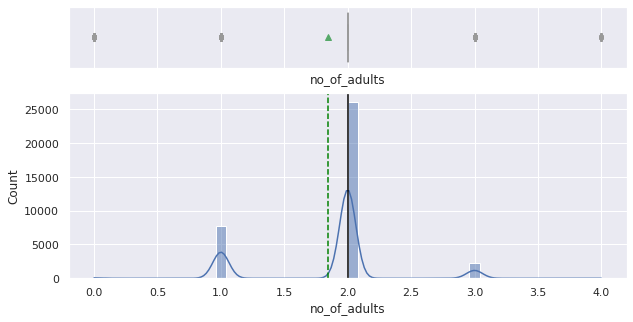

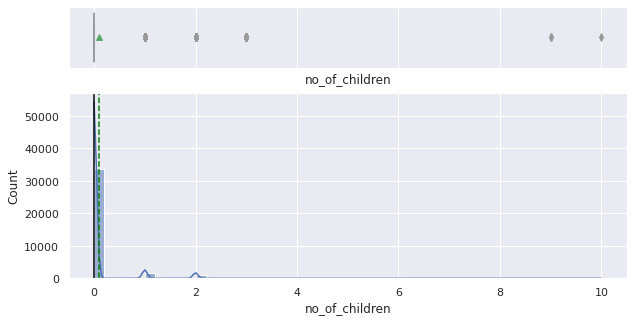

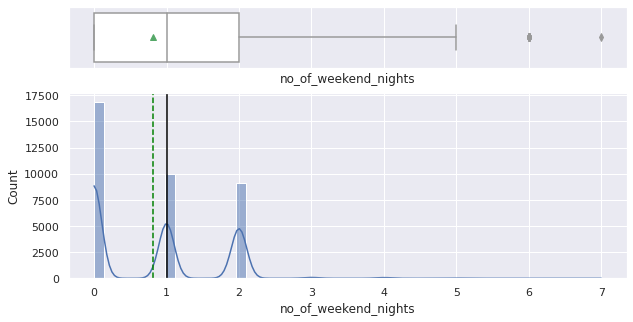

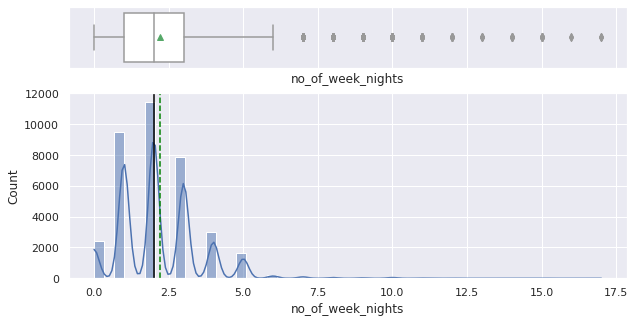

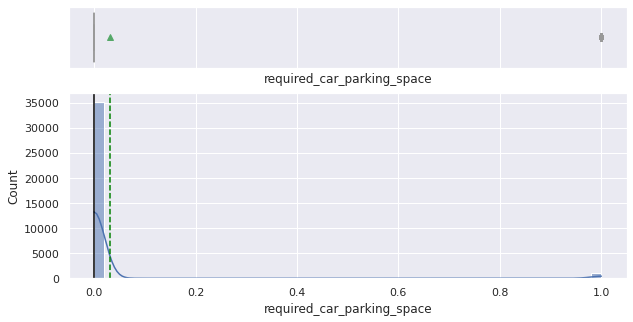

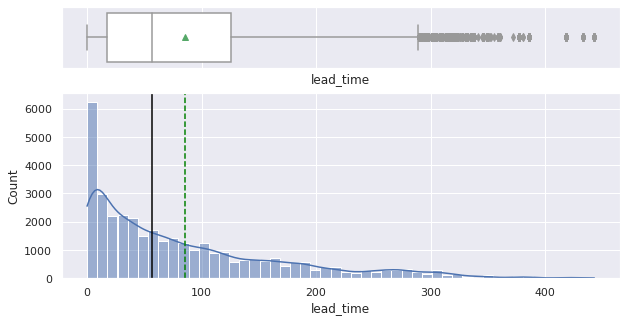

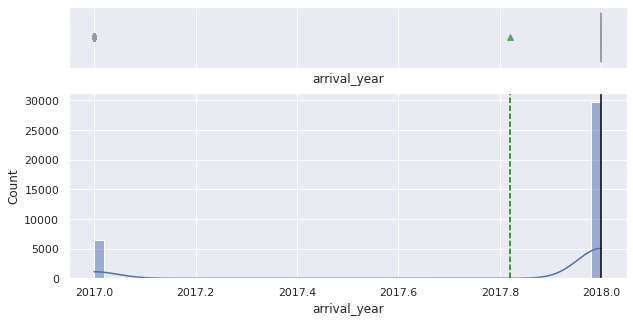

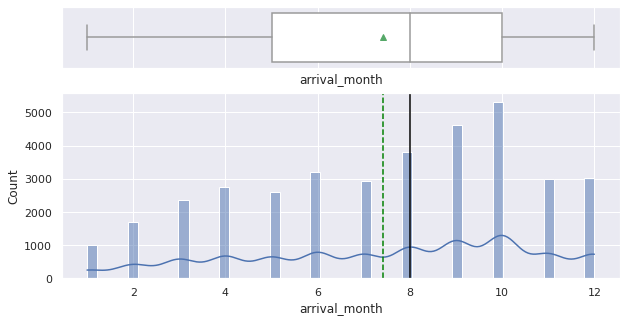

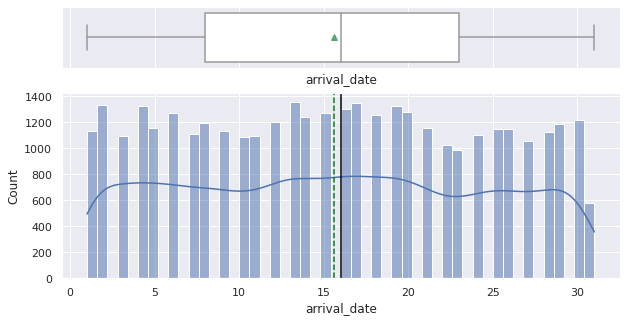

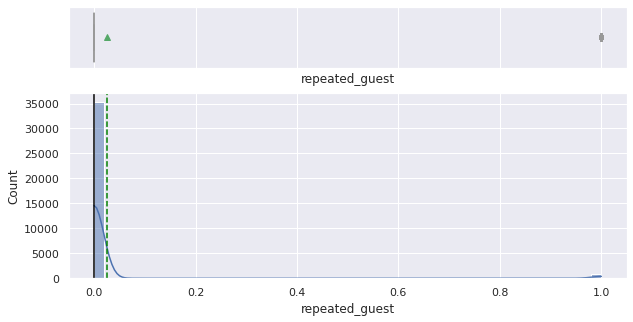

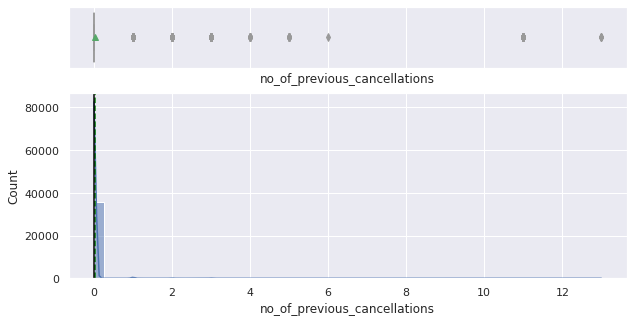

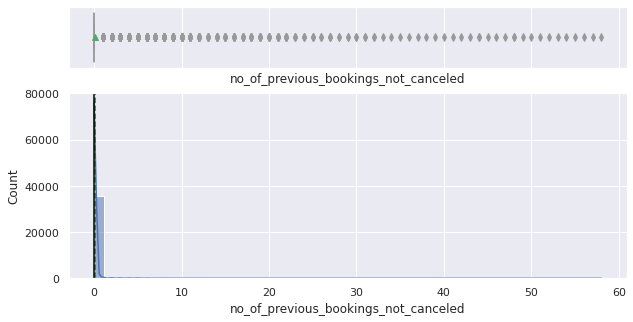

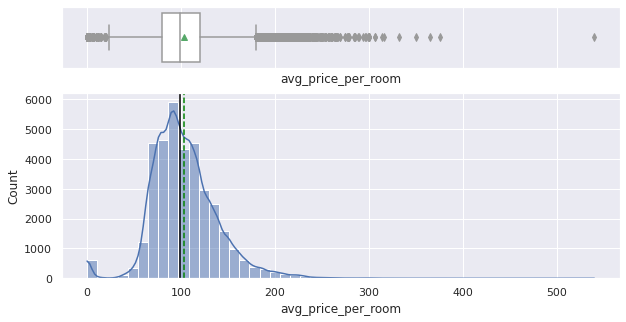

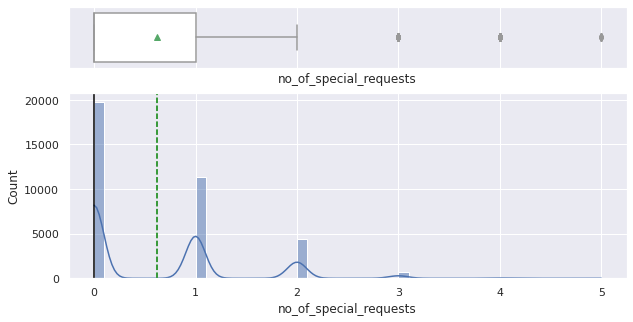

In [334]:
# selecting numerical columns
num_cols = hotel.select_dtypes(include=np.number).columns.tolist()

for item in num_cols:
    histogram_boxplot(hotel, item, bins=50, kde=True, figsize=(10, 5))

- no of adults seems to be normally distributed with outliers on both sides of the variable.
- - The distribution of lead time is right-skewed, and there are many outliers.
- Some customers made booking 500 days in advance.
- Many customers have made the booking on the same day of arrival as well.
- The distribution of average price per room is skewed to right. There are outliers on both sides.
- Very few customers have more than one cancellation
-  no_of_weekend_nights is skewed to the right with outliers present to the right of the variable>

In [335]:
# selecting numerical columns
num_col = hotel.select_dtypes(include=np.number).columns.tolist()

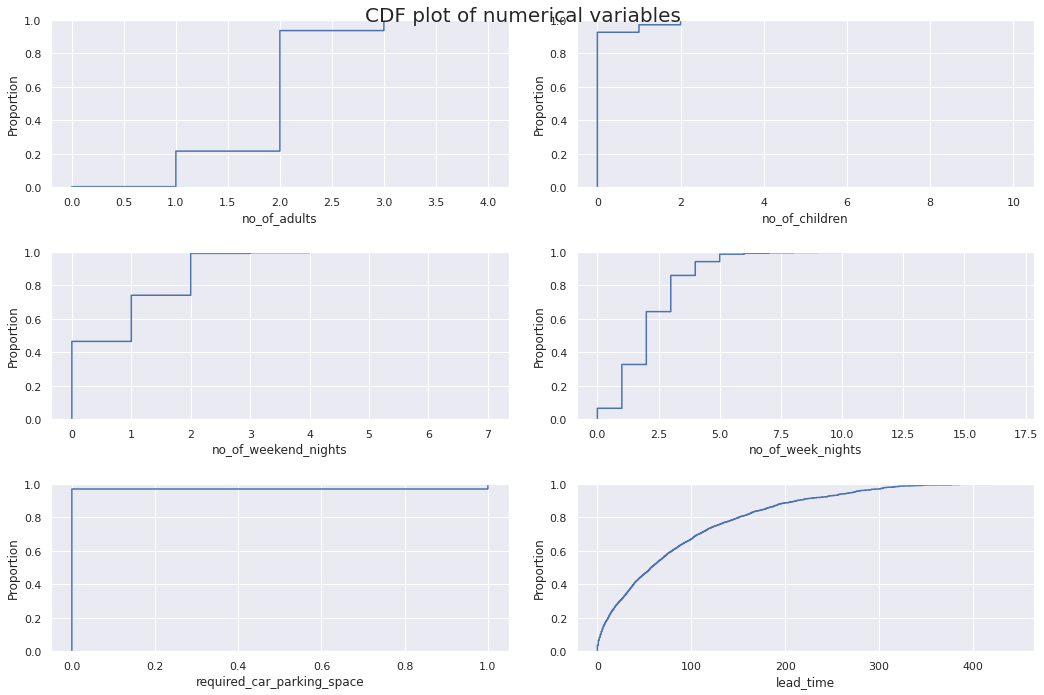

In [336]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
fig.suptitle("CDF plot of numerical variables", fontsize=20)
counter = 0
for ii in range(3):
    sns.ecdfplot(ax=axes[ii][0], x=hotel[num_col[counter]])
    counter = counter + 1
    if counter != 7:
        sns.ecdfplot(ax=axes[ii][1], x=hotel[num_col[counter]])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

- no of adults increases sharply at 2 adults then flattens out.
- no_of children starts with a sharp increase and flattens out at 2 children.
- Lead_time increases steadily and flattens out from 300 days

In [337]:
# Frequency tables for each categorical feature
for column in hotel.select_dtypes(include=['object']).columns:
    display(pd.crosstab(index=hotel[column], columns='% observations', normalize='columns'))

col_0,% observations
type_of_meal_plan,
Meal Plan 1,0.76733
Meal Plan 2,0.09111
Meal Plan 3,0.00014
Not Selected,0.14142


col_0,% observations
room_type_reserved,
Room_Type 1,0.77547
Room_Type 2,0.01908
Room_Type 3,0.00019
Room_Type 4,0.16697
Room_Type 5,0.00731
Room_Type 6,0.02663
Room_Type 7,0.00436


col_0,% observations
market_segment_type,
Aviation,0.00345
Complementary,0.01078
Corporate,0.05560
Offline,0.29023
Online,0.63994


col_0,% observations
booking_status,
Canceled,0.32764
Not_Canceled,0.67236


- 67% of the bookings are Not_Cancelled.
- Most customers use the Online market segment.
- Room_Type 7 is the least room_type_reserved 
- Meal plan 1 is the most consumed meal at 77%

In [338]:
# function to create labeled barplots


def labeled_barplot(hotel, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(hotel[feature])  # length of the column
    count = hotel[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=hotel,
        x=feature,
        palette="Paired",
        order=hotel[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [339]:
hotel.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

### Observations on No of Adults

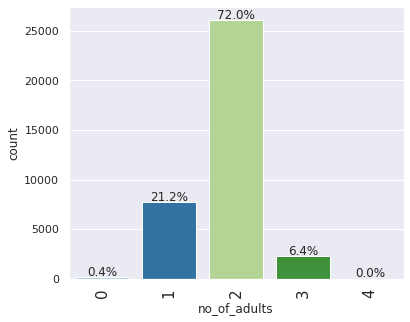

In [340]:
labeled_barplot(hotel, "no_of_adults", perc=True)

- 72% of the bookings were made for 2 adults.

### Observations on no_of_children

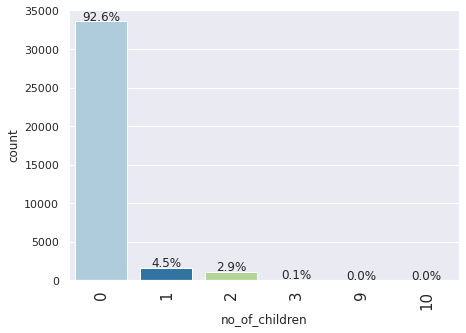

In [341]:
labeled_barplot(hotel, "no_of_children", perc=True)

- 93% of the customers didn't make reservations for children.
- There are some values in the data where the number of children is 9 or 10, which is highly unlikely.
- We will replace these values with the maximum value of 3 children

In [342]:
# replacing 9, and 10 children with 3
hotel["no_of_children"] = hotel["no_of_children"].replace([9, 10], 3)

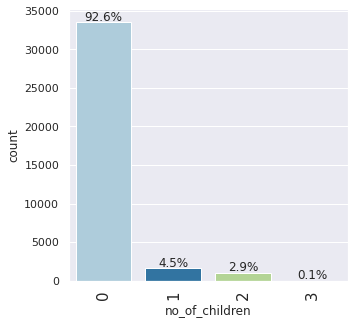

In [343]:
labeled_barplot(hotel, "no_of_children", perc=True)

### Observations on no_of_weekend_nights

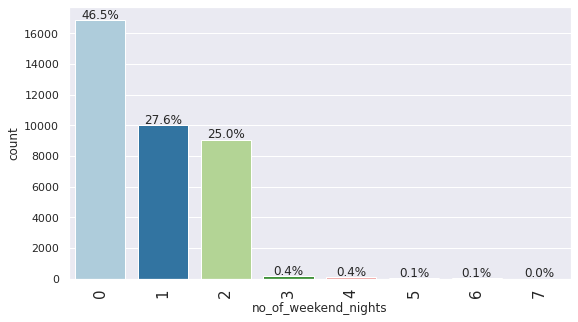

In [344]:
labeled_barplot(hotel, "no_of_weekend_nights", perc=True)

- 46.5 % of the customers did not make reservations for weekend nights

### Observations on booking_status

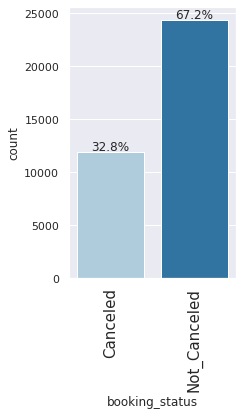

In [345]:
labeled_barplot(hotel, "booking_status", perc=True)

- 33% of the bookings were canceled by the customers.
- 67% of the bookings were not_canceled by the customers.

### Observations on required_car_parking_space

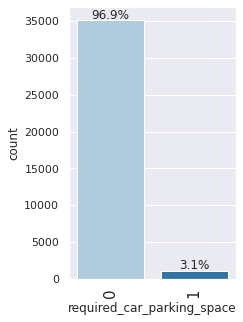

In [346]:
labeled_barplot(hotel, "required_car_parking_space", perc=True)

- 96.9% of the customers do not require a car parking space.

### Observations on type_of_meal_plan

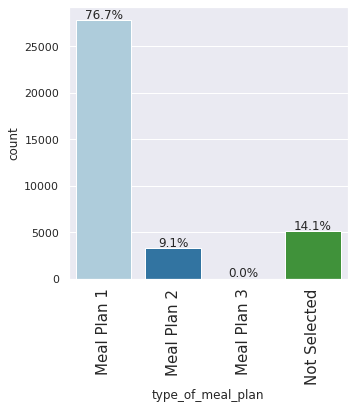

In [347]:
labeled_barplot(hotel, "type_of_meal_plan", perc=True)

- Most of the customers prefer meal plan 1 that is only breakfast.
- Meal Plan 3 was not ordered by Customers

### Observations on room_type_reserved

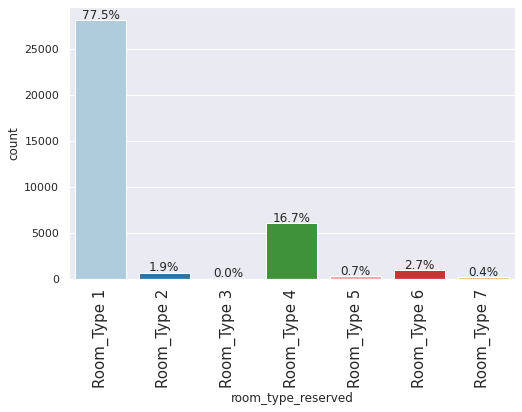

In [348]:
labeled_barplot(hotel, "room_type_reserved", perc=True)

- Around 77% of the customers booked Room_Type 1 followed by 16.7% of the customers booking Room_Type 4.

### Observations on market segment type

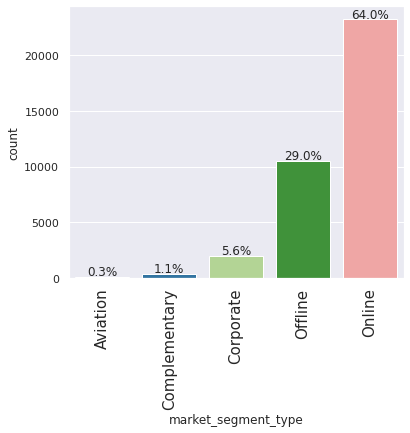

In [349]:
labeled_barplot(hotel, "market_segment_type", perc=True)

- Most customers embrace Online 

### Observations on number of special requests

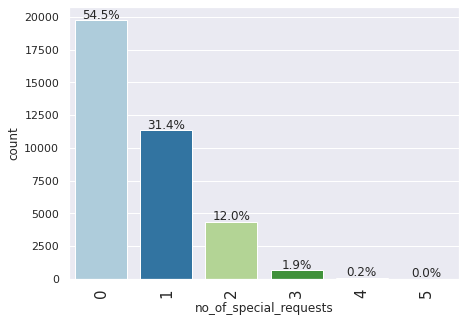

In [350]:
labeled_barplot(hotel, "no_of_special_requests", perc=True)

- 54.5% of the customers generally do not make any requests while booking a hotel room.

## Bivariate Analysis

In [351]:
df["booking_status"] = df["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

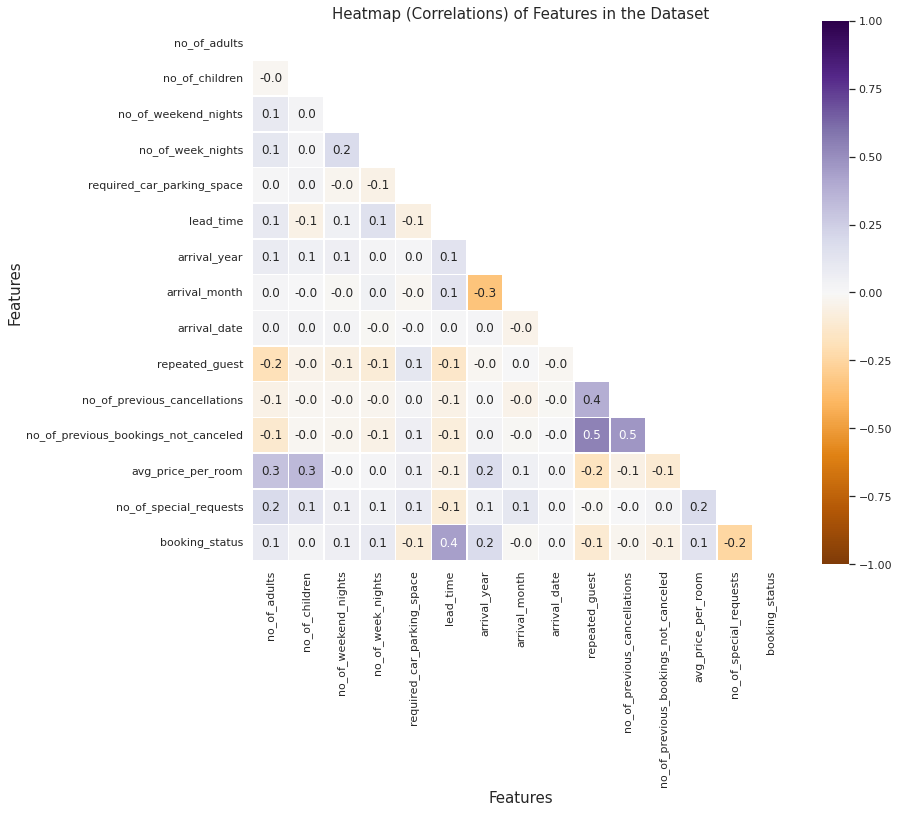

In [352]:
# Create a correlation for the dataset.
dataset_corr = df.corr().round(4)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix. Only bottom left corner valued. 
mask = np.zeros_like(dataset_corr.round(4))
mask[np.triu_indices_from(mask)] = True

# Generate the corrleation matrix (heatmap) using Seaborn. 
with sns.axes_style("whitegrid"):
    f, ax = plt.subplots(figsize=(12, 10))
    ax = sns.heatmap(dataset_corr.round(2), mask=mask, vmax=1, center = 0, vmin=-1, square=True, cmap='PuOr', linewidths=.5, annot=True, annot_kws={"size": 12}, fmt='.1f')
    plt.title('Heatmap (Correlations) of Features in the Dataset', fontsize=15)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Features', fontsize=15)
plt.show()

In [353]:
# Let's look at correlation beween features and target
df.corr()['booking_status']

no_of_adults                            0.08692
no_of_children                          0.03308
no_of_weekend_nights                    0.06156
no_of_week_nights                       0.09300
required_car_parking_space             -0.08619
lead_time                               0.43854
arrival_year                            0.17953
arrival_month                          -0.01123
arrival_date                            0.01063
repeated_guest                         -0.10729
no_of_previous_cancellations           -0.03373
no_of_previous_bookings_not_canceled   -0.06018
avg_price_per_room                      0.14257
no_of_special_requests                 -0.25307
booking_status                          1.00000
Name: booking_status, dtype: float64

- Booking Status is is positively correlated with lead_time 
- Booking status is negatively required_car_parking_space, arrival_month,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled

In [354]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [355]:
hotel['arrival_year'] = hotel['arrival_year'].astype('category')
hotel['arrival_month']= hotel['arrival_month'].astype('category')
hotel['type_of_meal_plan']= hotel['type_of_meal_plan'].astype('category')
hotel['room_type_reserved']= hotel['room_type_reserved'].astype('category')
hotel['arrival_date']= hotel['arrival_date'].astype('category')
hotel['market_segment_type']= hotel['market_segment_type'].astype('category')
hotel['room_type_reserved']= hotel['room_type_reserved'].astype('category')
hotel['repeated_guest']= hotel['repeated_guest'].astype('category')
hotel['booking_status']= hotel['booking_status'].astype('category')


In [356]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          36275 non-null  int64   
 1   no_of_children                        36275 non-null  int64   
 2   no_of_weekend_nights                  36275 non-null  int64   
 3   no_of_week_nights                     36275 non-null  int64   
 4   type_of_meal_plan                     36275 non-null  category
 5   required_car_parking_space            36275 non-null  int64   
 6   room_type_reserved                    36275 non-null  category
 7   lead_time                             36275 non-null  int64   
 8   arrival_year                          36275 non-null  category
 9   arrival_month                         36275 non-null  category
 10  arrival_date                          36275 non-null  category
 11  ma

In [357]:
group_year_month = hotel.groupby(['arrival_year','arrival_month'])

In [358]:
average_year_month = group_year_month['avg_price_per_room'].sum()
average_year_month

arrival_year  arrival_month
2017          1                    0.00000
              2                    0.00000
              3                    0.00000
              4                    0.00000
              5                    0.00000
              6                    0.00000
              7                30815.24000
              8                92366.68000
              9               170399.72000
              10              176057.22000
              11               46803.40000
              12               69999.47000
2018          1                75796.26000
              2               137570.13000
              3               216661.76000
              4               279068.72000
              5               295680.14000
              6               358628.70000
              7               295200.77000
              8               339280.11000
              9               364047.07000
              10              379361.24000
              11          

- There was no revenue charge for the rooms for month 1-6 in the year 2017
- A lot of revenue was obtained in the 8th month in 2018

In [359]:
# function to plot stacked bar chart


def stacked_barplot(hotel, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = hotel[predictor].nunique()
    sorter = hotel[target].value_counts().index[-1]
    tab1 = pd.crosstab(hotel[predictor], hotel[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(hotel[predictor], hotel[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Observations on market segment Type Verses Booking Status

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     11885         24390  36275
Online                   8475         14739  23214
Offline                  3153          7375  10528
Corporate                 220          1797   2017
Aviation                   37            88    125
Complementary               0           391    391
------------------------------------------------------------------------------------------------------------------------


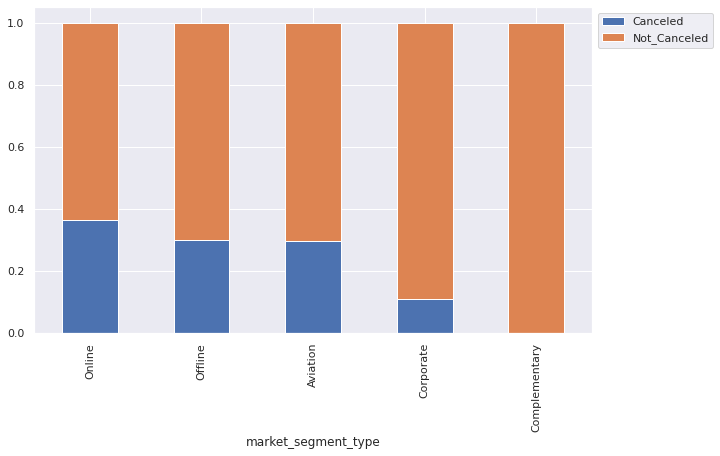

In [360]:
stacked_barplot(hotel, "market_segment_type", "booking_status")

- Around 40% of the online booking were canceled.
- Bookings made offline are less prone to cancellations.
- Corporate and Complementary segment shows least cancellation

### Booking Status Vs Arrival Year

booking_status  Canceled  Not_Canceled    All
arrival_year                                 
All                11885         24390  36275
2018               10924         18837  29761
2017                 961          5553   6514
------------------------------------------------------------------------------------------------------------------------


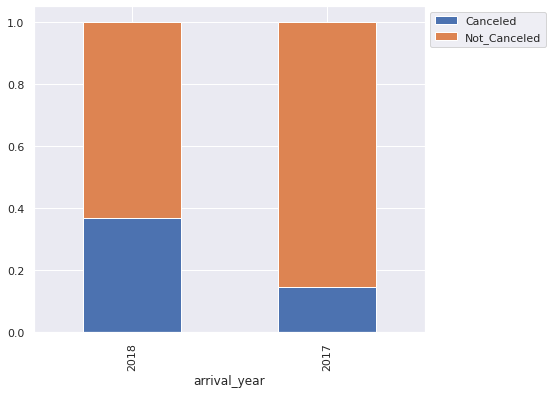

In [361]:
stacked_barplot(hotel, "arrival_year", "booking_status")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


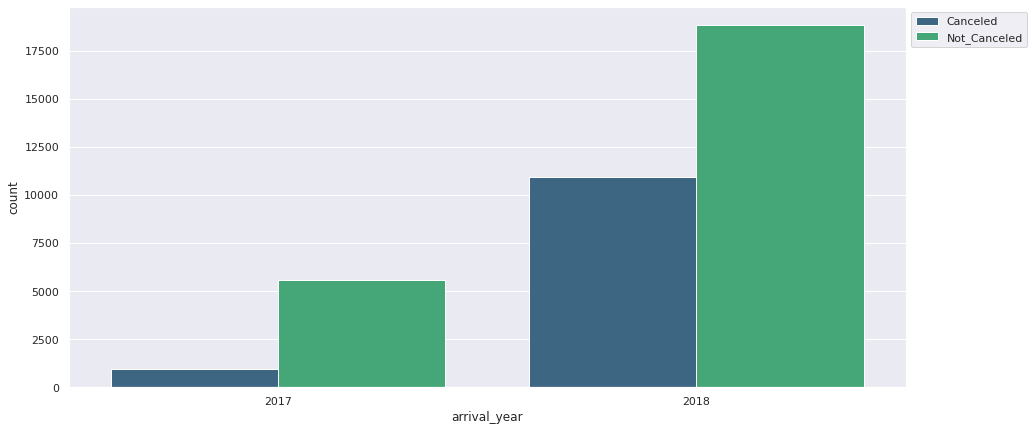

In [362]:
plt.figure(figsize=(15,7))
sns.countplot(hotel["arrival_year"],hue=hotel["booking_status"],palette='viridis')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

- 2018 had the highests bookings Not_Canceled
- 2017 had the least bookings cancelled

### Booking Status Verses Arrival Month

In [363]:
# Replace Columns With Categorical Variables
hotel["arrival_month"] = hotel["arrival_month"].replace(
    {1: "Jan", 
     2: "Feb", 
     3: "March",
     4: "April", 
     5: "May", 
     6: "June",
     7: "July",
     8: "Aug",
     9: "Sep", 
     10: "Oct", 
     11: "Nov", 
     12:"Dec"})

booking_status  Canceled  Not_Canceled    All
arrival_month                                
All                11885         24390  36275
Oct                 1880          3437   5317
Sep                 1538          3073   4611
Aug                 1488          2325   3813
July                1314          1606   2920
June                1291          1912   3203
April                995          1741   2736
May                  948          1650   2598
Nov                  875          2105   2980
March                700          1658   2358
Feb                  430          1274   1704
Dec                  402          2619   3021
Jan                   24           990   1014
------------------------------------------------------------------------------------------------------------------------


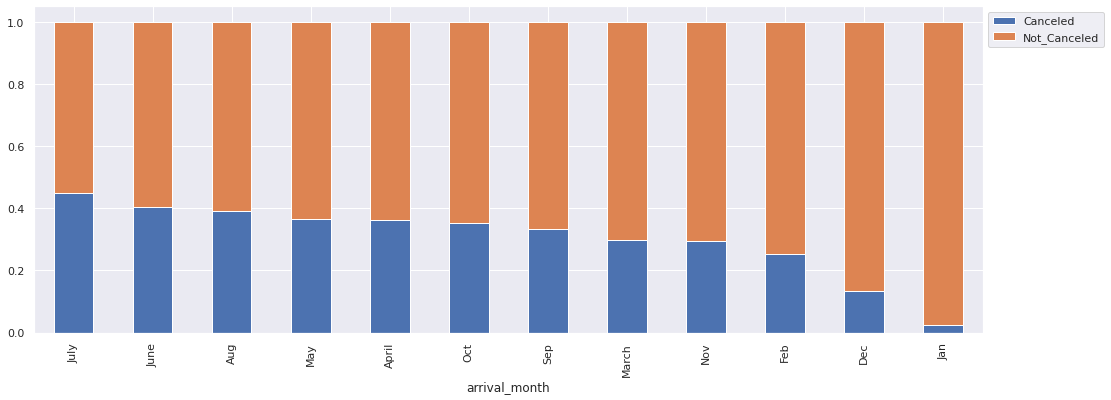

In [364]:
stacked_barplot(hotel, "arrival_month", "booking_status")

- January had the least Cancelled bookings and July had the highest cancelled bookings.


### Booking Status Vs *Family*

In [365]:
family_data = hotel[(hotel["no_of_children"] >= 0) & (hotel["no_of_adults"] > 1)]
family_data.shape

(28441, 18)

In [366]:
family_data["no_of_family_members"] = (
    family_data["no_of_adults"] + family_data["no_of_children"]
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


booking_status        Canceled  Not_Canceled    All
no_of_family_members                               
All                       9985         18456  28441
2                         8213         15506  23719
3                         1368          2425   3793
4                          398           514    912
5                            6            11     17
------------------------------------------------------------------------------------------------------------------------


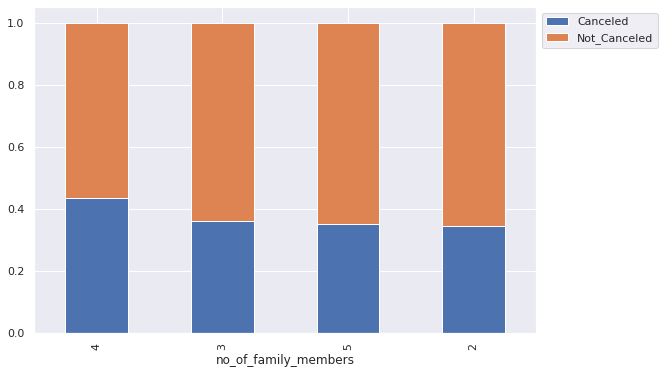

In [367]:
stacked_barplot(family_data, "no_of_family_members", "booking_status")

- 4 family members had the highest Cancelled Bookings
- Family of 2 has the least Bookings Not_Cancelled

### Booking Status Verses Nights

In [368]:
hotel["total_days"] = (
    hotel["no_of_week_nights"] + hotel["no_of_weekend_nights"]
)

booking_status  Canceled  Not_Canceled    All
total_days                                   
All                11885         24390  36275
3                   3586          6466  10052
2                   2899          5573   8472
4                   1941          3952   5893
1                   1466          5138   6604
5                    823          1766   2589
6                    465           566   1031
7                    383           590    973
8                     79           100    179
10                    58            51    109
9                     53            58    111
14                    27             5     32
15                    26             5     31
13                    15             3     18
12                    15             9     24
11                    15            24     39
20                     8             3     11
16                     5             1      6
19                     5             1      6
17                     4          

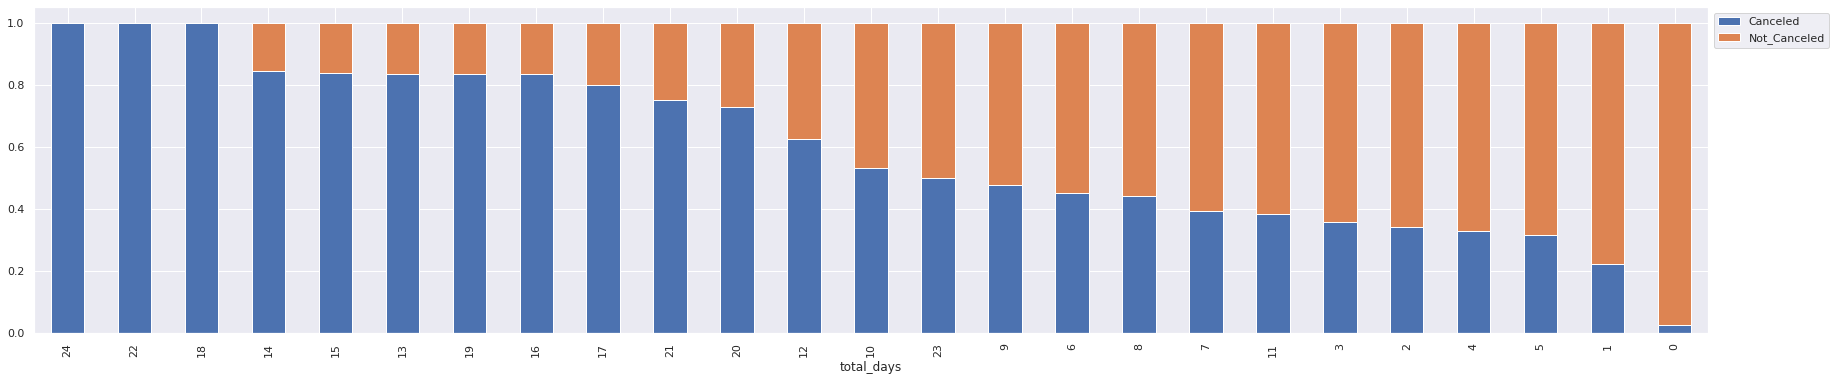

In [369]:
stacked_barplot(hotel, "total_days", "booking_status")

- All Bookings from 18 days to 24 days were cancelled.
- Customers who spent Zero nights majorly did not Cancel bookings

### Booking Status by Lead Time

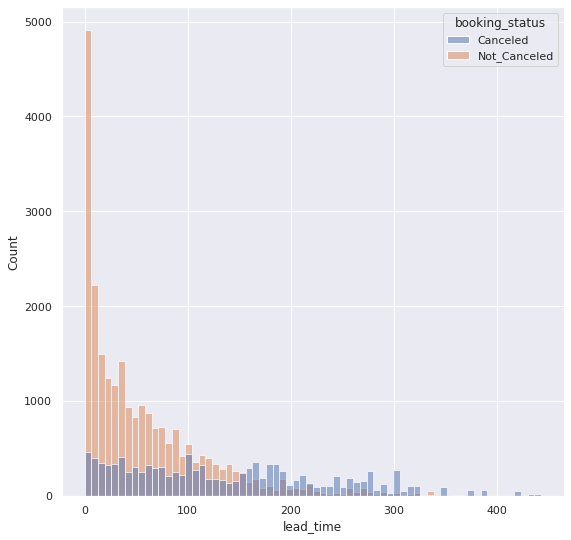

In [370]:
plt.figure(figsize=(9, 9))
sns.histplot(data = hotel, x = 'lead_time', hue = 'booking_status')
plt.show()

- Lead_time increase leads to increase in cancelled bookings.

## Multivariate Analysis

### Booking Status Verses Arrival Year Verses Avg_Price_per_room

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


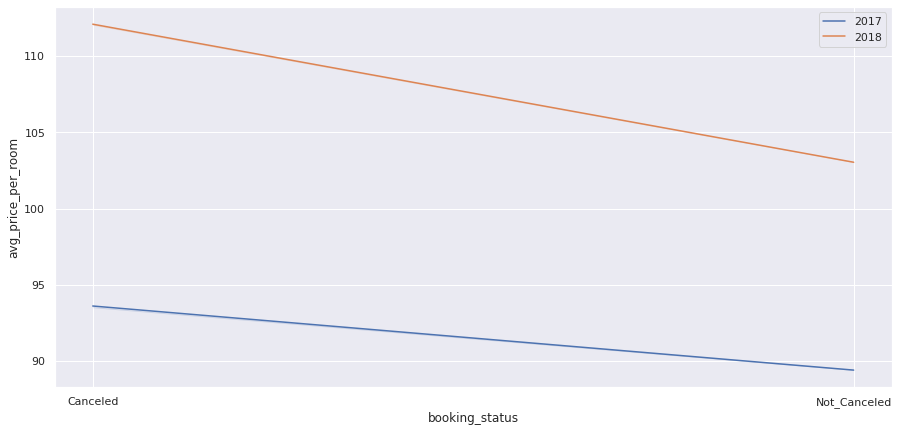

In [371]:
plt.figure(figsize=(15,7))
sns.lineplot(hotel["booking_status"],hotel["avg_price_per_room"],hue=hotel["arrival_year"],ci=0)
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

- In 2017 Cancelled Bookings had a higher average price than bookings Not Cancelled.
- In 2018 Cancelled Bookings had a higher average price than bookings Not Cancelled.

### Booking Status Verses Average Price Verses Arrival Year

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


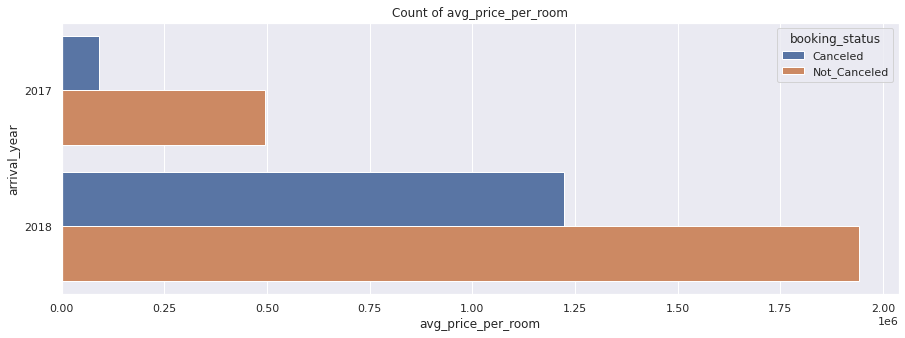

In [372]:
df1= hotel['avg_price_per_room'].groupby([hotel['arrival_year'],hotel['booking_status']]).sum()
df2=df1.reset_index().sort_values(by='avg_price_per_room',ascending=False)
fig = plt.figure(figsize=(15,5))
plt.title('Count of avg_price_per_room')

sns.barplot(df2['avg_price_per_room'],df2['arrival_year'],hue=df2["booking_status"]);

- Cancelled Bookings in 2017 are the lowest in average price as compared to 2018.
- 2018 Bookings Not Cancelled have the highest average price as compared to 2017

### Booking Status Verses Market Segment Verses Average Price

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


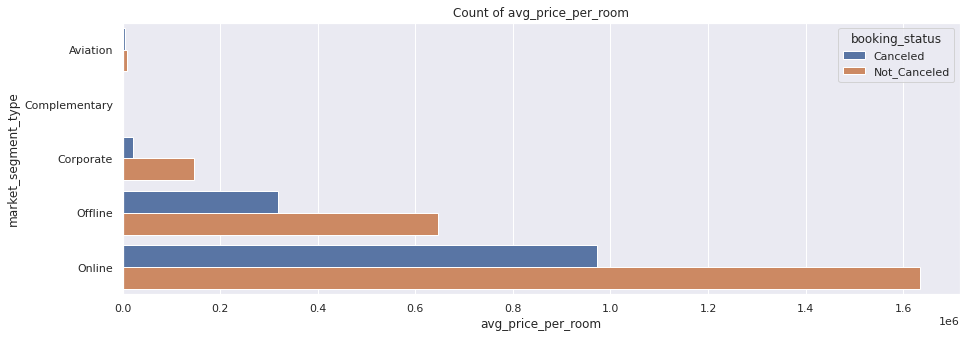

In [373]:
df1= hotel['avg_price_per_room'].groupby([hotel['market_segment_type'],hotel['booking_status']]).sum()
df2=df1.reset_index().sort_values(by='avg_price_per_room',ascending=False)
fig = plt.figure(figsize=(15,5))
plt.title('Count of avg_price_per_room')

sns.barplot(df2['avg_price_per_room'],df2['market_segment_type'],hue=df2["booking_status"]);

- Online market segments gives the highest average room price on Bookings Not Cancelled.
- Complementary segement customers have no impact on bookings and average price.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

## Missing Values

In [374]:
def missing_check(hotel):
    total = hotel.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (hotel.isnull().sum()/hotel.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(hotel)

,Total,Percent
no_of_adults,0,0.00000
arrival_date,0,0.00000
booking_status,0,0.00000
no_of_special_requests,0,0.00000
avg_price_per_room,0,0.00000
no_of_previous_bookings_not_canceled,0,0.00000
no_of_previous_cancellations,0,0.00000
repeated_guest,0,0.00000
market_segment_type,0,0.00000
arrival_month,0,0.00000


- There are no missing values in the dataset

## Outlier Detection

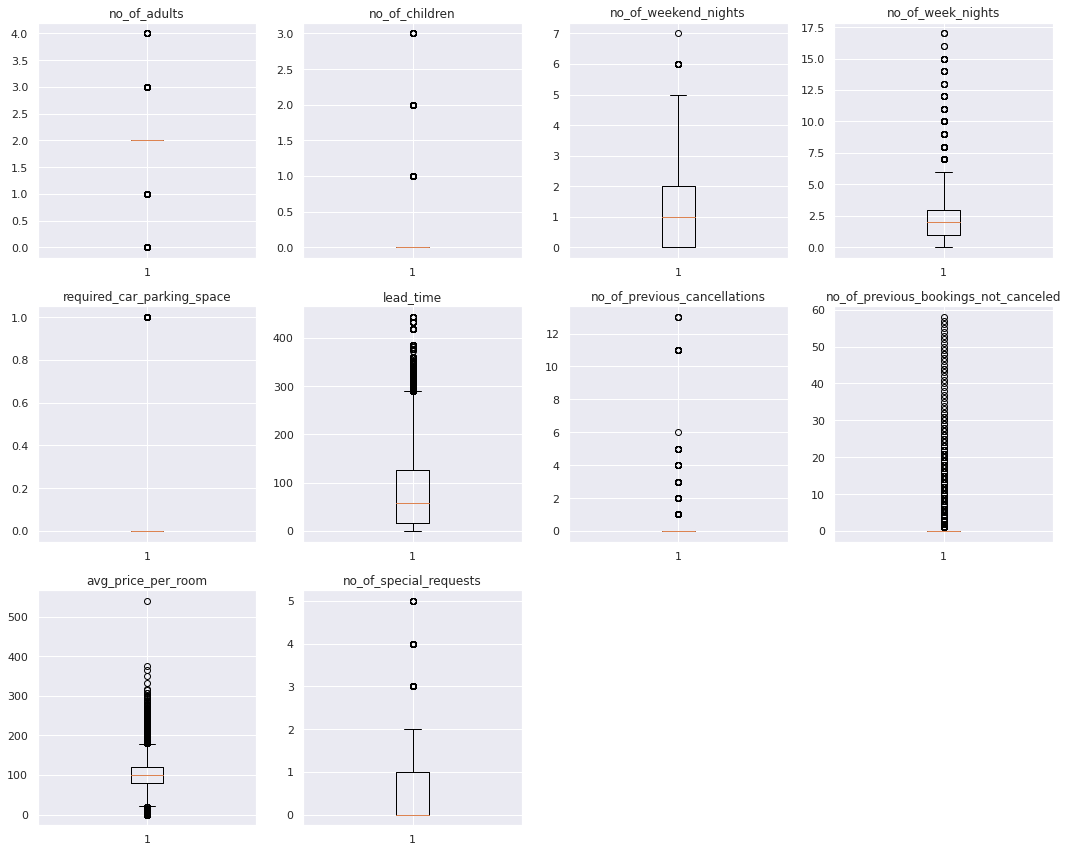

In [375]:
# outlier detection using boxplot
numeric_columns = hotel.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
numeric_columns.remove("total_days")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(hotel[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

*** Observations

- There are quite a few outliers in the data.
- However, we will not treat them as they are proper values.

In [376]:
# Drop total days as we used it for pre-processing
hotel.drop(["total_days"], axis=1, inplace=True)


## Building a Logistic Regression model

### Data Preparation for modeling

- We want to predict which bookings will be canceled.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [377]:
hotel["booking_status"] = hotel["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

In [378]:
# https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn
from collections import defaultdict
d = defaultdict(preprocessing.LabelEncoder)

In [379]:
# Encoding the variable
hotel = hotel.apply(lambda x: d[x.name].fit_transform(x))

In [380]:
X = hotel.drop(["booking_status"], axis=1)
Y = hotel["booking_status"]

#X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [381]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 17)
Shape of test set :  (10883, 17)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking.
2. Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking. 

### Which case is more important? 
* Both the cases are important as:

* If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and will have to bear additional costs of distribution channels.

* If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage the brand equity. 



### How to reduce the losses?

* Hotel would want `F1 Score` to be maximized, greater the F1  score higher are the chances of minimizing False Negatives and False Positives. 

In [382]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [383]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Logistic Regression (with Sklearn library)

---



In [384]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data

lg = LogisticRegression(solver="newton-cg", random_state=1)
model = lg.fit(X_train, y_train)

In [385]:
# predicting on training set
y_pred_train = lg.predict(X_train)

In [386]:
print("Training set performance:")
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Precision:", precision_score(y_train, y_pred_train))
print("Recall:", recall_score(y_train, y_pred_train))
print("F1:", f1_score(y_train, y_pred_train))

Training set performance:
Accuracy: 0.804820415879017
Precision: 0.7455672480899525
Recall: 0.6184383594403922
F1: 0.676078431372549


### Checking performance on test set

In [387]:
# predicting on the test set
y_pred_test = lg.predict(X_test)

In [388]:
print("Test set performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test))
print("Recall:", recall_score(y_test, y_pred_test))
print("F1:", f1_score(y_test, y_pred_test))

Test set performance:
Accuracy: 0.8049251125608747
Precision: 0.7359190556492411
Recall: 0.619534355479841
F1: 0.6727300755356868


**Observations**

- F1 score on the training and test set is very close, which indicates our model is not overfitting and the model is a good fit.
- The F1 score is 0.67 on the training and test set.

### Logistic Regression (with statsmodels library)

In [389]:
# https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn
from collections import defaultdict
d = defaultdict(preprocessing.LabelEncoder)

In [390]:
# Encoding the variable
hotel = hotel.apply(lambda x: d[x.name].fit_transform(x))

In [391]:
hotel.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,224,0,10,1,3,0,0,0,343,0,0
1,2,0,2,3,3,0,0,5,1,9,5,4,0,0,0,1912,1,0
2,1,0,2,1,0,0,0,1,1,3,27,4,0,0,0,238,0,1
3,2,0,0,2,0,0,0,211,1,8,19,4,0,0,0,1645,0,1
4,2,0,1,1,3,0,0,48,1,0,10,4,0,0,0,1435,0,1


In [392]:
X = hotel.drop(["booking_status"], axis=1)
Y = hotel["booking_status"]

# adding constant
X = sm.add_constant(X)

#X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [393]:
X.head()

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,1.00000,2,0,1,2,0,0,0,224,0,10,1,3,0,0,0,343,0
1,1.00000,2,0,2,3,3,0,0,5,1,9,5,4,0,0,0,1912,1
2,1.00000,1,0,2,1,0,0,0,1,1,3,27,4,0,0,0,238,0
3,1.00000,2,0,0,2,0,0,0,211,1,8,19,4,0,0,0,1645,0
4,1.00000,2,0,1,1,3,0,0,48,1,0,10,4,0,0,0,1435,0


In [394]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   no_of_adults                          36275 non-null  int64
 1   no_of_children                        36275 non-null  int64
 2   no_of_weekend_nights                  36275 non-null  int64
 3   no_of_week_nights                     36275 non-null  int64
 4   type_of_meal_plan                     36275 non-null  int64
 5   required_car_parking_space            36275 non-null  int64
 6   room_type_reserved                    36275 non-null  int64
 7   lead_time                             36275 non-null  int64
 8   arrival_year                          36275 non-null  int64
 9   arrival_month                         36275 non-null  int64
 10  arrival_date                          36275 non-null  int64
 11  market_segment_type                   362

In [395]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25374
Method:                           MLE   Df Model:                           17
Date:                Fri, 22 Jul 2022   Pseudo R-squ.:                  0.3117
Time:                        04:18:42   Log-Likelihood:                -11075.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -7.5756      0.170    -44.631      0.000      -7.908      -7.243
no_of_adults                             0.0845      

**Observations**

- Negative values of the coefficient show that the probability of customers canceling the booking decreases with the increase of the corresponding attribute value.

- Positive values of the coefficient show that the probability of customer canceling increases with the increase of corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

- But these variables might contain multicollinearity, which will affect the p-values.

* We will have to remove multicollinearity from the data to get reliable coefficients and p-values.

* There are different ways of detecting (or testing) multi-collinearity, one such way is the Variation Inflation Factor.

In [396]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80490,0.61892,0.74550,0.67634


### CHecking for Multicollinearity

In [397]:
# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [398]:
checking_vif(X_train)

,feature,VIF
0,const,53.67844
1,no_of_adults,1.32023
2,no_of_children,1.26040
3,no_of_weekend_nights,1.06789
4,no_of_week_nights,1.09144
5,type_of_meal_plan,1.14842
6,required_car_parking_space,1.03635
7,room_type_reserved,1.53889
8,lead_time,1.14822
9,arrival_year,1.13359


- None of the numerical variables show moderate or high multicollinearity.
- We will ignore the VIF for the dummy variables.

### Dropping high p-value variables

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [399]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']


In [400]:
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

In [401]:
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(disp=False)
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25377
Method:                           MLE   Df Model:                           14
Date:                Fri, 22 Jul 2022   Pseudo R-squ.:                  0.3109
Time:                        04:18:43   Log-Likelihood:                -11089.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -7.3134      0.158    -46.306      0.000      -7.623      -7.004
no_of_children                           0.0851      

- All the variables left a significant (P-value<0.5).

In [402]:
print("Training performance:")
model_performance_classification_statsmodels(lg1, X_train1, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80340,0.61581,0.74325,0.67355


###  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [403]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns).T

,const,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,lead_time,arrival_year,arrival_month,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
Odds,0.00067,1.08878,1.12965,1.04981,1.14280,0.24542,1.01385,2.04766,1.01999,3.01901,0.16749,1.42611,0.88261,1.00059,0.25033
Change_odd%,-99.93335,8.87835,12.96496,4.98057,14.28002,-75.45825,1.38549,104.76629,1.99936,201.90067,-83.25142,42.61112,-11.73902,0.05858,-74.96714


### Coefficient interpretations

* `no_of_children`: Holding all other features constant a 1 unit increase in the number of children will increase the odds of a booking getting cancelled by 1.10 times or a 8.87% decrease in the odds of a booking getting cancelled.
* `no_of_week_nights`: Holding all other features constant a 1 unit increase in the number of weeknights a customer stays at the hotel will increase the odds of a booking getting cancelled by 1.13 times or a 13% increase in the odds of a booking getting cancelled.
* `required_car_parking_space`: The odds of a customer who requires a car parking space are 0.25 times more than a customer who doesn't require a car parking space or a 75.5% fewer odds of a customer canceling their booking.
* `lead_time`: Holding all other features constant a 1 unit increase in the lead time will increase the odds of a booking getting cancelled by 1.01 times or a 1.38% decrease in the odds of a booking getting cancelled.


#### Checking model performance on the training set

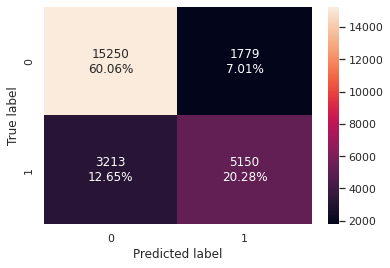

In [404]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train)

In [405]:
print("Training performance:")
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg1, X_train1, y_train
)
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80340,0.61581,0.74325,0.67355


#### ROC-AUC
* ROC-AUC on training set

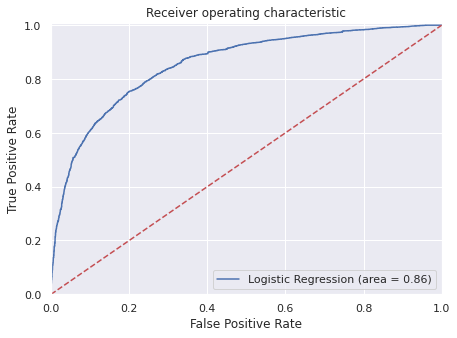

In [406]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

### Model Performance Improvement

* Let's see if the recall score can be improved further, by changing the model threshold using AUC-ROC Curve.

### Optimal threshold using AUC-ROC curve

---



In [407]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3491842247081841


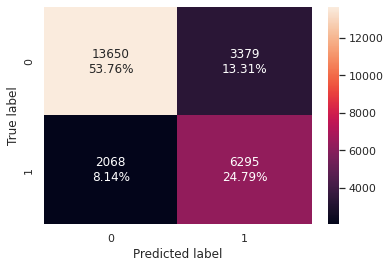

In [408]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)

In [409]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.78548,0.75272,0.65071,0.69801


#### Let's use Precision-Recall curve and see if we can find a better threshold

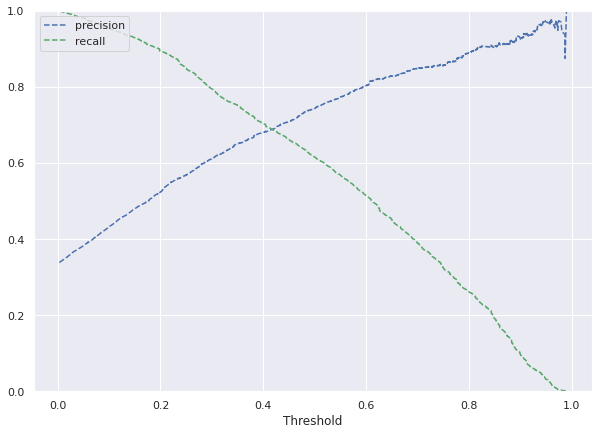

In [410]:
y_scores = lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [455]:
# setting the threshold
optimal_threshold_curve = 0.42

#### Checking model performance on training set

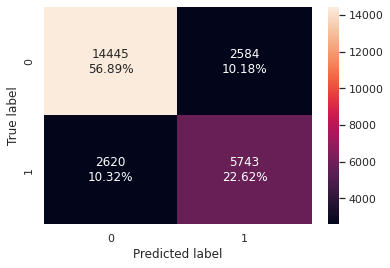

In [456]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_curve)

In [457]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79505,0.68672,0.68968,0.68820


### Let's check the performance on the test set

**Using model with default threshold**

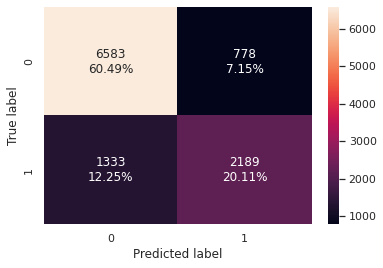

In [458]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test)

In [459]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg1, X_test1, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80603,0.62152,0.73778,0.67468


* ROC curve on test set

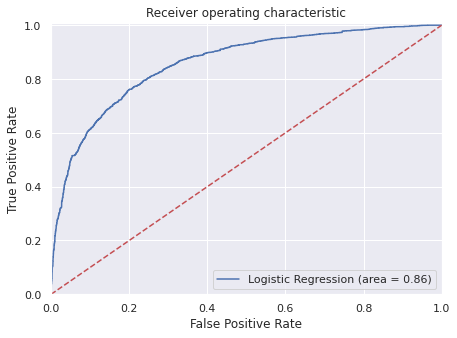

In [460]:
logit_roc_auc_train = roc_auc_score(y_test, lg1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

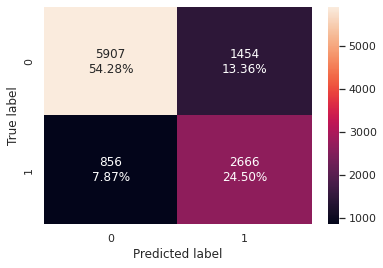

In [461]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc)

In [462]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.78774,0.75696,0.64709,0.69772


*** Using model with threshold = 0.42

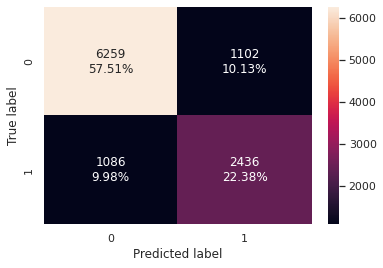

In [463]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_curve)

In [464]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.79895,0.69165,0.68852,0.69008


## Final Model Summary

In [466]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.31 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.31 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80340,0.78548,0.79505
Recall,0.61581,0.75272,0.68672
Precision,0.74325,0.65071,0.68968
F1,0.67355,0.69801,0.68820


### Observations from Logistic Regression model
- We have been able to build a predictive model that can be used by the hotel to predict which bookings are likely to be cancelled with an F1 score of 0.69 on the training set and formulate marketing policies accordingly.

* The logistic regression models are giving a generalized performance on training and test set.

* **Using the model with default threshold the model will give a low recall but good precision score -** The hotel will be able to predict which bookings will be cancelled and will be able to provide satisfactory services to those customers which help in maintaining the brand equity but will lose on resources. 
* **Using the model with a 0.31 threshold the model will give a high recall but low precision score -** The hotel will be able to save resources by correctly predicting the bookings which are likely to be cancelled but might damage the brand equity.
* **Using the model with a 0.42 threshold the model will give a balance recall and precision score -** The hotel will be able to maintain a balance between resources and brand equity. 


## Building a Decision Tree model

In [422]:
X = hotel.drop(["booking_status"], axis=1)
Y = hotel["booking_status"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models. 
* The confusion_matrix_sklearnfunction will be used to plot the confusion matrix.

In [423]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [424]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Building Decision Tree Model

In [425]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### Checking model performance on training set

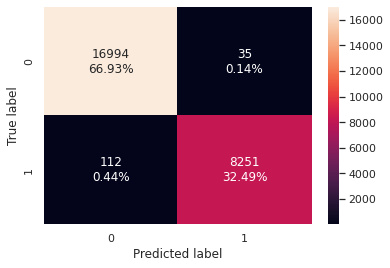

In [426]:
confusion_matrix_statsmodels(model, X_train, y_train)

In [427]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.99421,0.98661,0.99578,0.99117


#### Checking model performance on test set

In [428]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.87053,0.80579,0.79652,0.80113


- Model performs well on trainig on F1 than on the test data.

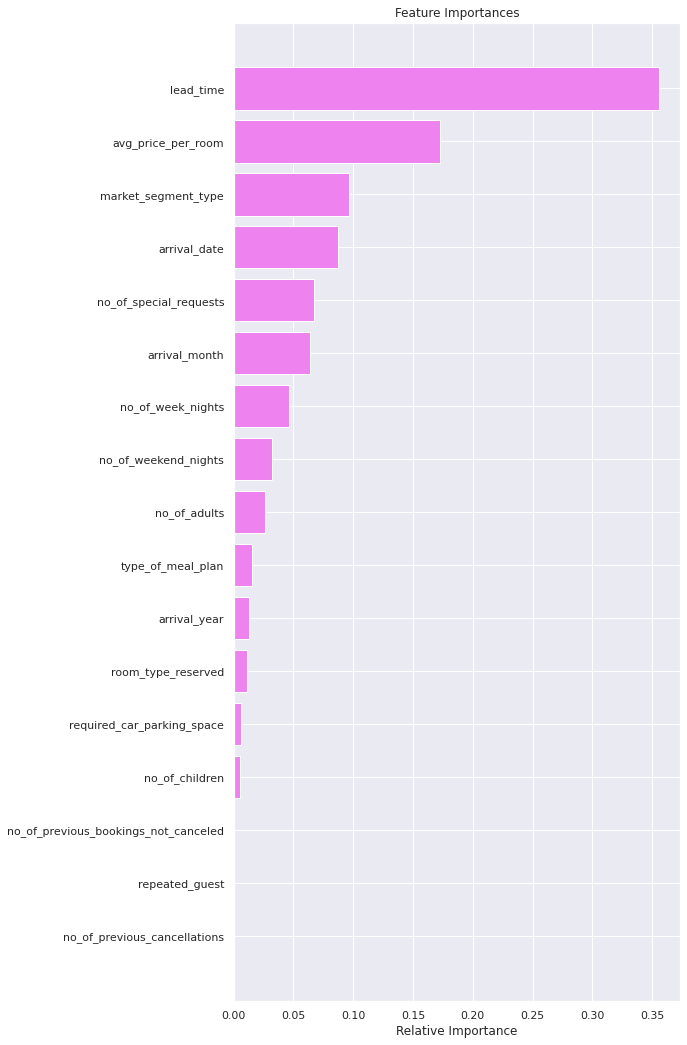

In [429]:
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 18))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Lead time is the most important variable while no_of_children is the least variable

### Pruning the tree

**Pre-Pruning**

In [430]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

#### Checking performance on training set

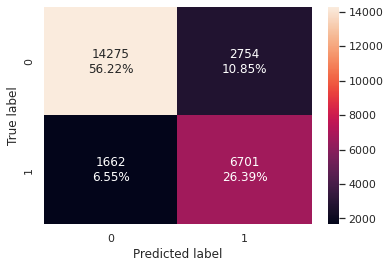

In [431]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [432]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.82609,0.80127,0.70873,0.75216


#### Checking performance on training set

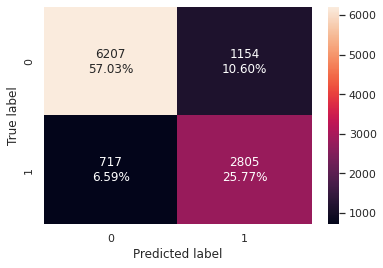

In [433]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [434]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.82808,0.79642,0.70851,0.74990


### Visualizing the Decision Tree

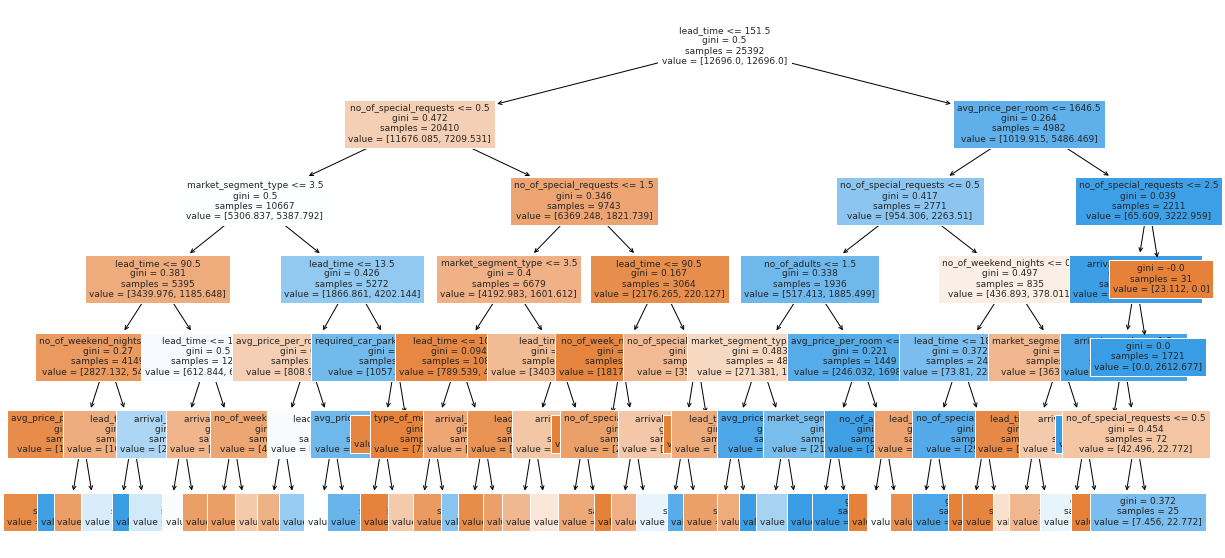

In [435]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [436]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type <= 3.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 3673.00
|   |   |   |   |   |   |--- weights: [1736.39, 132.08] class: 0
|   |   |   |   |   |--- avg_price_per_room >  3673.00
|   |   |   |   |   |   |--- weights: [0.75, 25.81] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- arrival_month <= 0.50
|   |   |   |   |   |   |--- weights: [1.49, 129.04] class: 1
|   |   |   |   |   |--- arrival_month >  0.50
|   |   |   |   |   |   |--- weights: [295.98, 384.08] class: 1
|   |   |

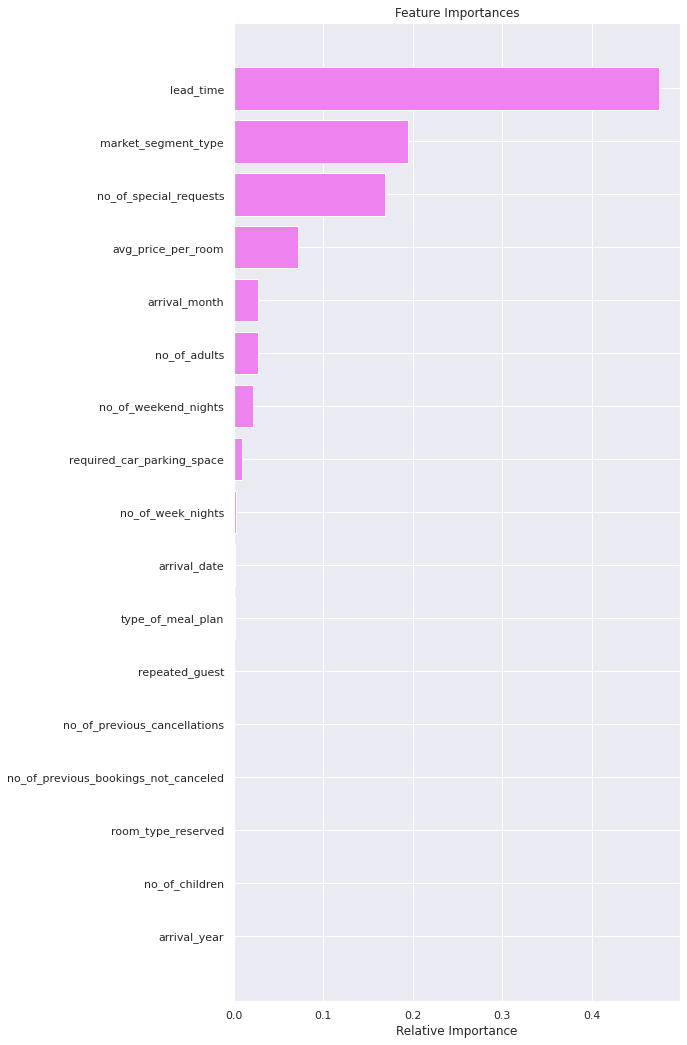

In [437]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 18))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Observations from decision tree

* We can see that the tree has become simpler and the rules of the trees are readable.
* The model performance of the model has been generalized.


* We observe that the most important features are:
    * Lead Time
    * Number of special requests
    * Market Segment - Online
    * Average price per room


**Cost Complexity Pruning**

In [438]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [439]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00838
1,0.00000,0.00838
2,0.00000,0.00838
3,0.00000,0.00838
4,0.00000,0.00838
...,...,...
1851,0.00890,0.32806
1852,0.00980,0.33786
1853,0.01272,0.35058
1854,0.03412,0.41882


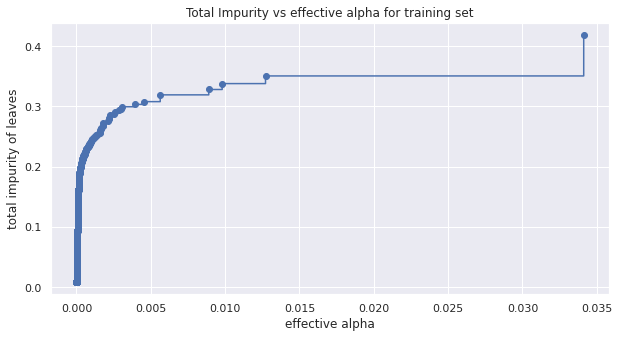

In [440]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [441]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389137054


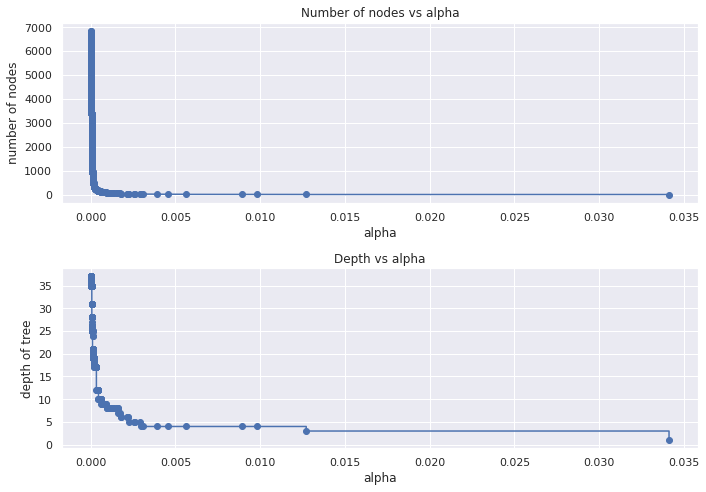

In [442]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### F1 Score vs alpha for training and testing sets

In [443]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

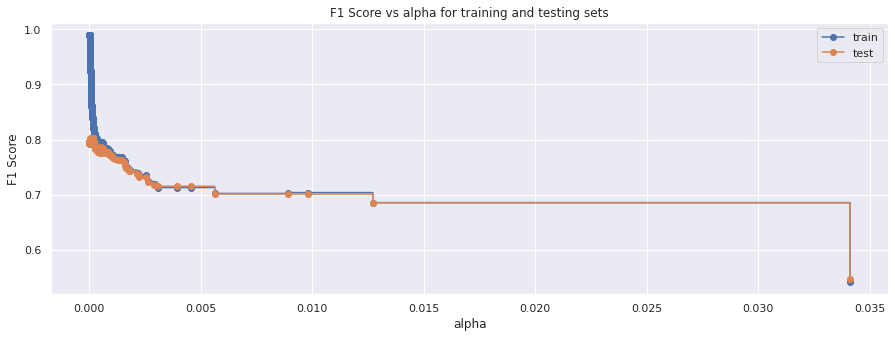

In [444]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [445]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00014331514587111334,
                       class_weight='balanced', random_state=1)


#### Checking performance on training set

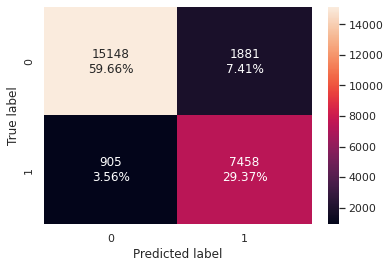

In [446]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [447]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.89028,0.89179,0.79859,0.84262


#### Checking performance on test set

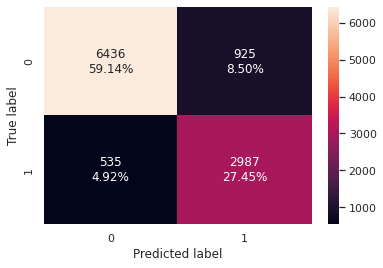

In [448]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [449]:
decision_tree_post_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.86585,0.84810,0.76355,0.80361


**Observations**
* After post pruning the decision tree the performance has generalized on training and test set.
* We are getting high recall with this model but difference between recall and precision has increased.

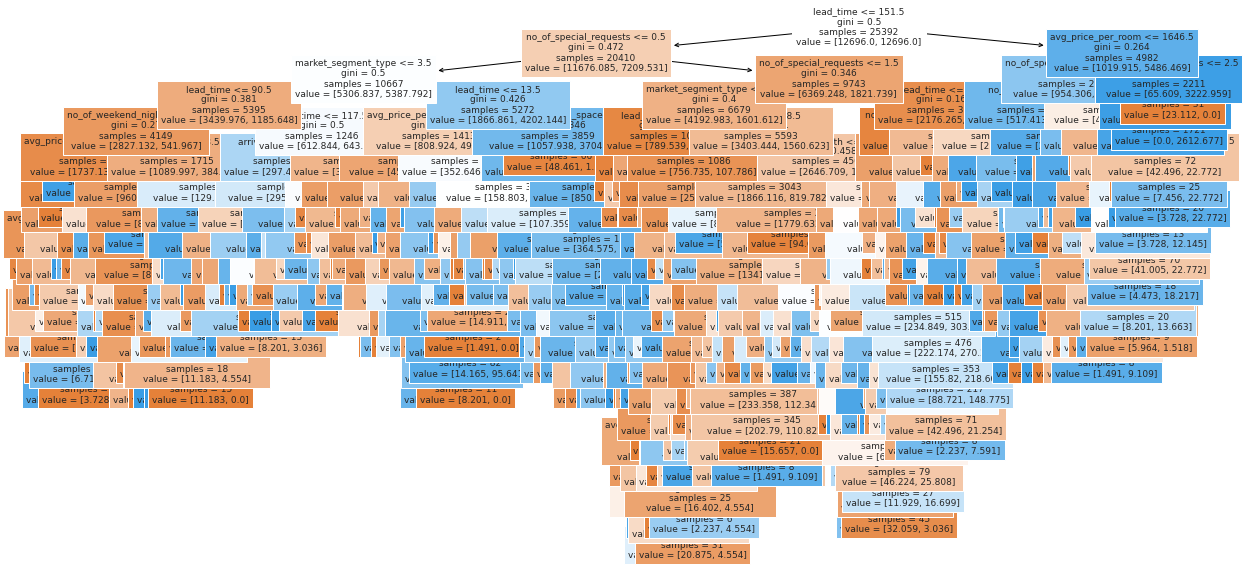

In [450]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [451]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type <= 3.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 3673.00
|   |   |   |   |   |   |--- market_segment_type <= 2.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 453.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  453.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 28.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |--- arrival_date >  28.50
|   |   |   |   |   |   |

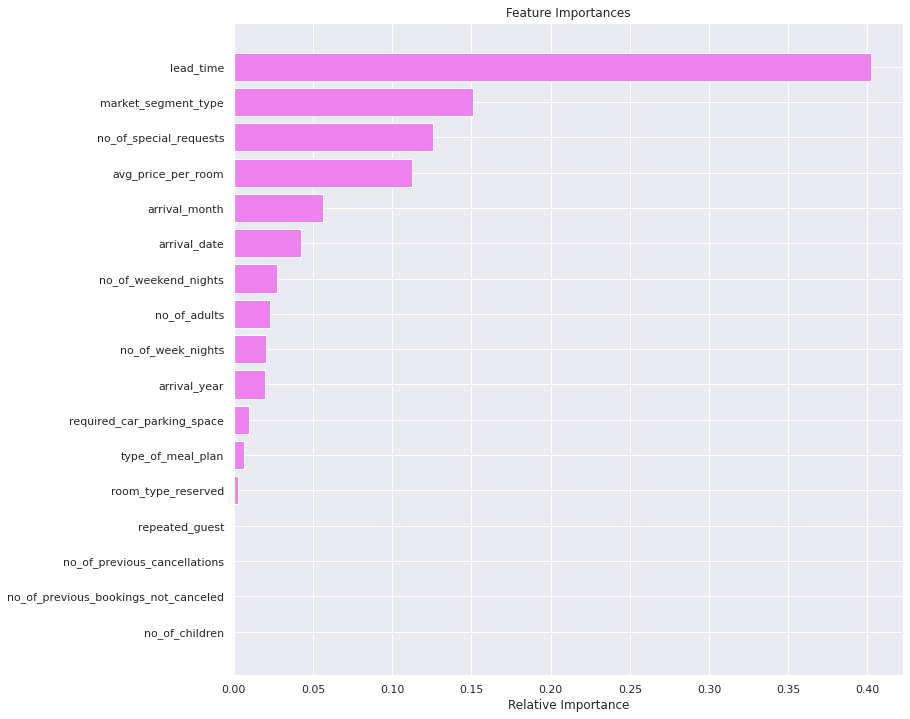

In [452]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations from tree**
* The tree is quite complex as complex as compared to the pre-pruned tree.
* The feature importance is same as we got in pre-pruned tree.

## Model Performance Comparison and Conclusions

In [453]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.99421,0.82609,0.89028
Recall,0.98661,0.80127,0.89179
Precision,0.99578,0.70873,0.79859
F1,0.99117,0.75216,0.84262


## Actionable Insights and Recommendations

### Conclusion
* Overall we can see that the Decision Tree model performs better on the dataset.
* Looking at important variables based on p-values in Logistic regression and feature importance in the Decision Tree model
    * Lead Time, Number of special requests, Market Segment - Online, Average price per room are important in both model
    * From the Logistic Regression model we observe that Lead Time, Average price per room, and Online market segment have a positive relation with bookings getting canclled. And the number of special requests has negative relation with bookings getting cancelled.

### Business Recommendations

1. The lead time and the number of special requests made by the customer play a key role in identifying if a booking will be cancelled or not. 

   Bookings where a customer has made a special request and the booking was done under 150 days to the date of arrival are less likely to be canceled. But the likelihood of a booking getting cancelled increases if the booking was done more than 150 days before the date of arrival.

    * Using this information, the hotel can take the following actions for the customer who have booked more than 150 days in advance:
        * Set up a system that can send a prompt like an automated email to the customers 90 days before the arrival date asking for a  re-confirmation of their booking and any changes they would like to make in their bookings.
        * Remind guests about imminent deadlines 1 month prior to the date of arrival.
 
The response given by the customer will give the hotel ample time to re-sell the room or make preparations for the customers' requests.

Note: The thresholds have been decided based on the distribution of the lead time for the bookings that were not cancelled. The median and the 75th percentile of the lead time for such bookings is around 30 days and 90 days.

2. Stricter cancellation policies can be adopted by the hotel. 
    * The bookings where the average price per room is high, and there were special requests associated should not get a full refund as the loss of resources will be high in these cases.
    * Ideally the cancellation policies should be consistent across all market segments but as noticed in our analysis high percentage of bookings done online are cancelled. The booking cancelled online should yield less percentage of refund to the customers.
    
The refunds, cancellation fee, etc should be highlighted on the website/app before a customer confirms their booking to safeguard guests' interest.

3. The length of stay at the hotel can be restricted.
    * We saw in our analysis that bookings, where the total length of stay was more than 5 days, had higher chances of getting cancelled.
    * Hotel can allow bookings up to 5 days only and then customers should be asked to re-book if they wish to stay longer. These policies can be relaxed for corporate and Aviation market segments. For other market segments, the process should be fairly easy to not hamper their experience with the hotel.

Such restrictions can be strategized by the hotel to generate additional revenue.

4. In the months November, December, and January cancellation to non-cancellation ratio is low. Customers might travel to celebrate Christmas and New Year. The hotel should ensure that enough human resources are available to cater to the needs of the guests.

5. July and August saw the highest number of bookings but also the highest number of cancellations. This should be investigated further by the hotel. 

6. Improving the experience of repeated customers.

    * Our analysis shows that there are very few repeated customers and the cancellation among them is very less which is a good indication as repeat customers are important for the hospitality industry as they can help in spreading the word of mouth.
    * A loyal guest is usually more profitable for the business because they are more familiar with offerings from the hotel they have visited before.
    * Attracting new customers is tedious and costs more as compared to a repeated guest.
    * A loyalty program that offers - special discounts, access to services in hotels, etc for these customers can help in improving their experience.